# Max

## Research question/interests

Briefly describe your research question or interests here.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
airlinedata1=pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
airlinedata3=pd.read_csv('../data/raw/airline_data_filtered.csv')
# airlinedata1 doesn't include data on baggage etc.
#airlinedata2=pd.read_excel('../data/raw/airline_greviance_data_2021.xlsx'
us_map = gpd.read_file('../data/SHP files/States_shapefile.shp')
#us_map
df = airlinedata3.groupby('Statecode')['weather_delay'].sum().reset_index()
us_map = us_map.rename(columns={'State_Code':'Statecode'})


<AxesSubplot:title={'center':'Weather Delays by State'}>

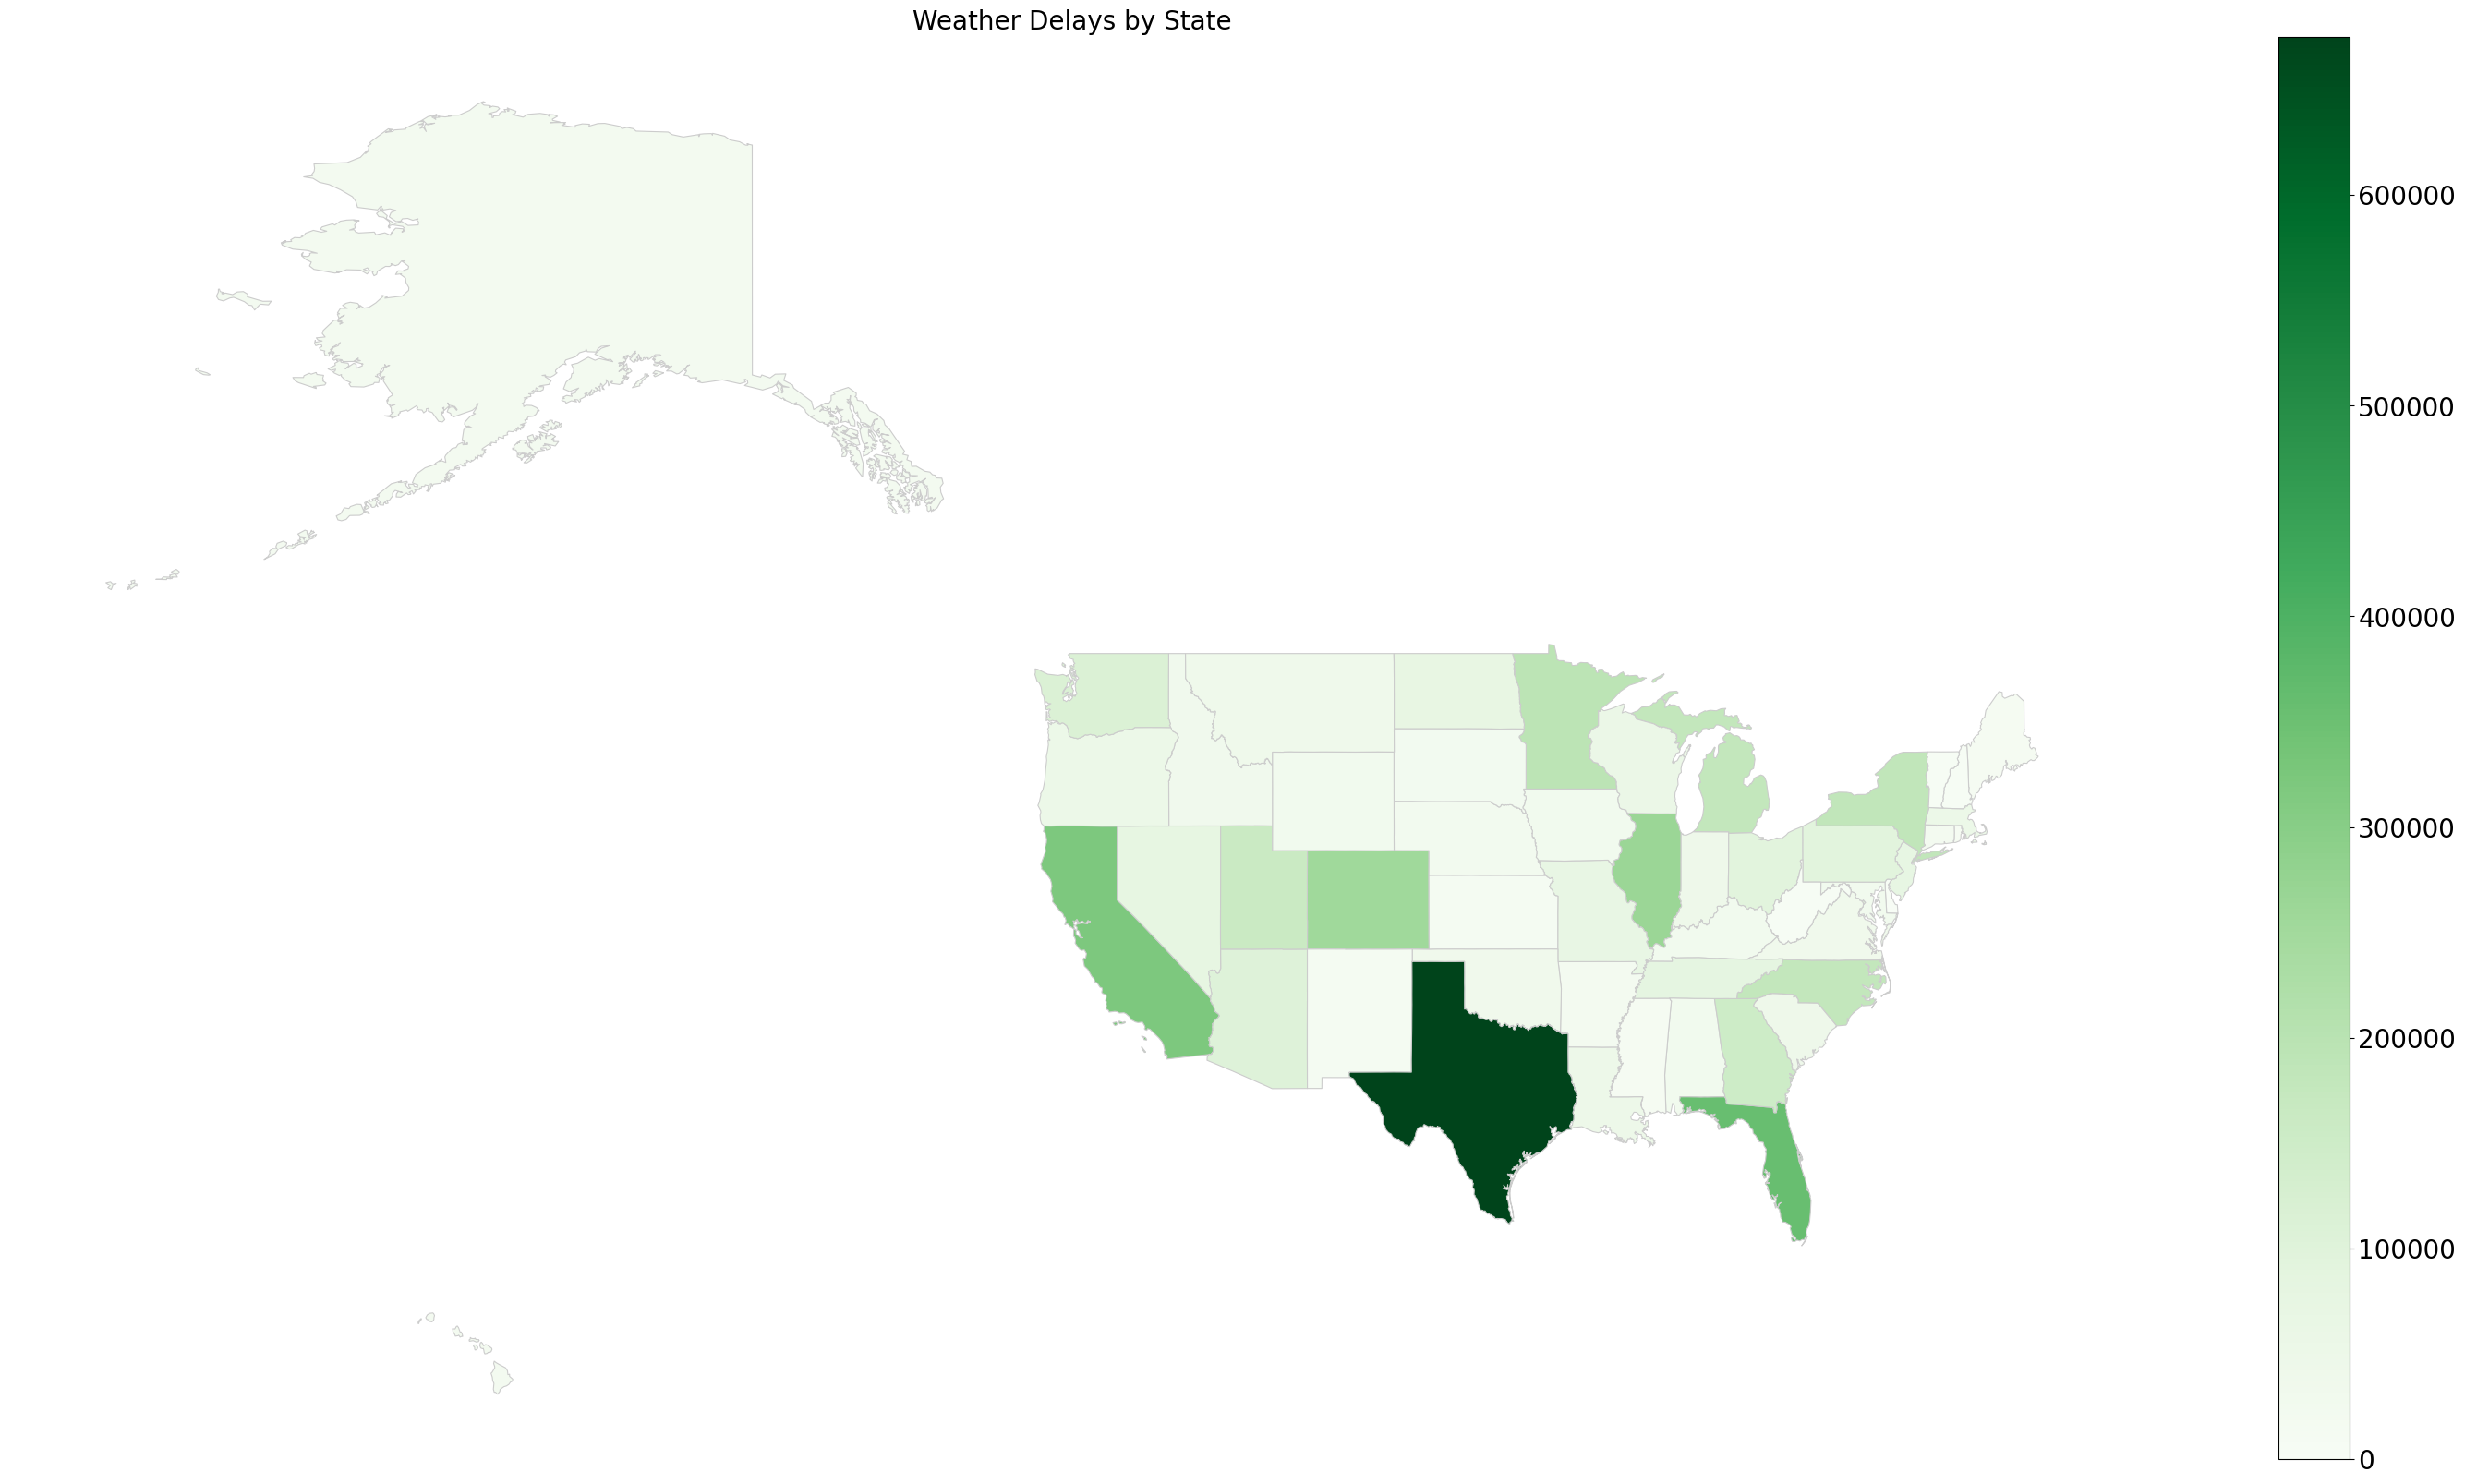

In [4]:
merged = us_map.set_index('Statecode').join(df.set_index('Statecode'))
merged = merged.reset_index()
merged = merged.fillna(0)
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Weather Delays by State', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 675000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('weather_delay', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))


<AxesSubplot:>

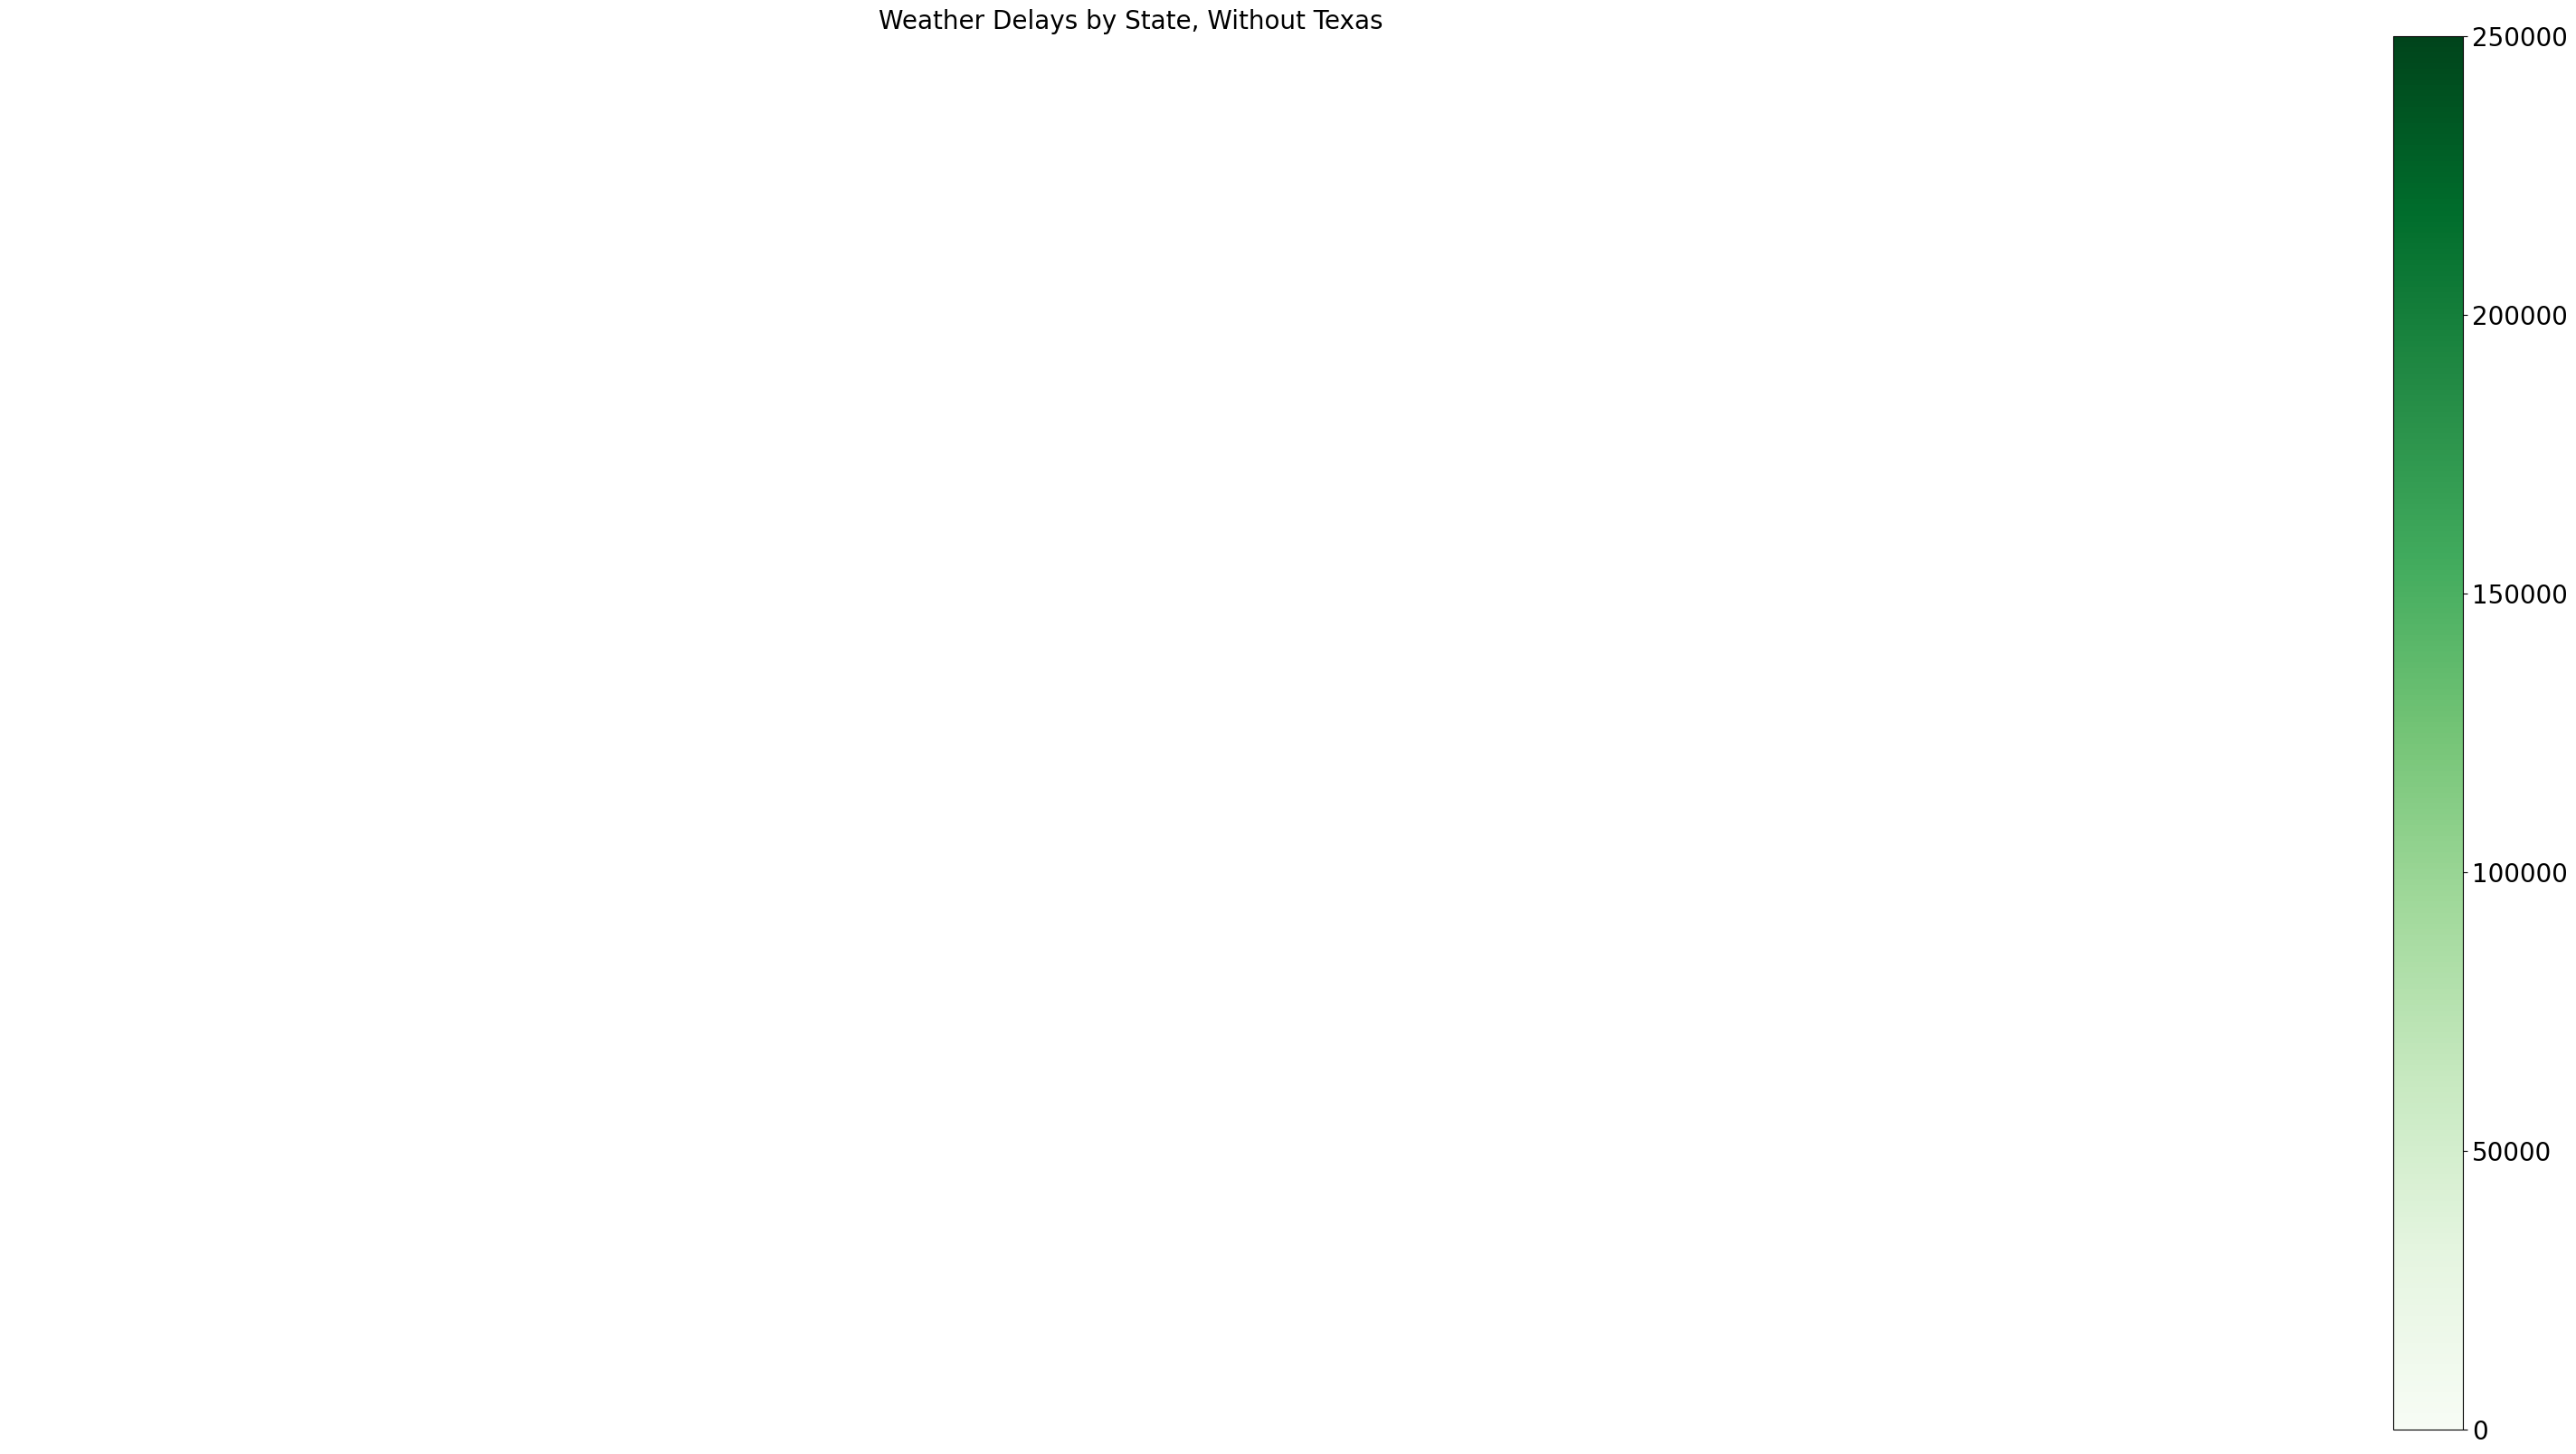

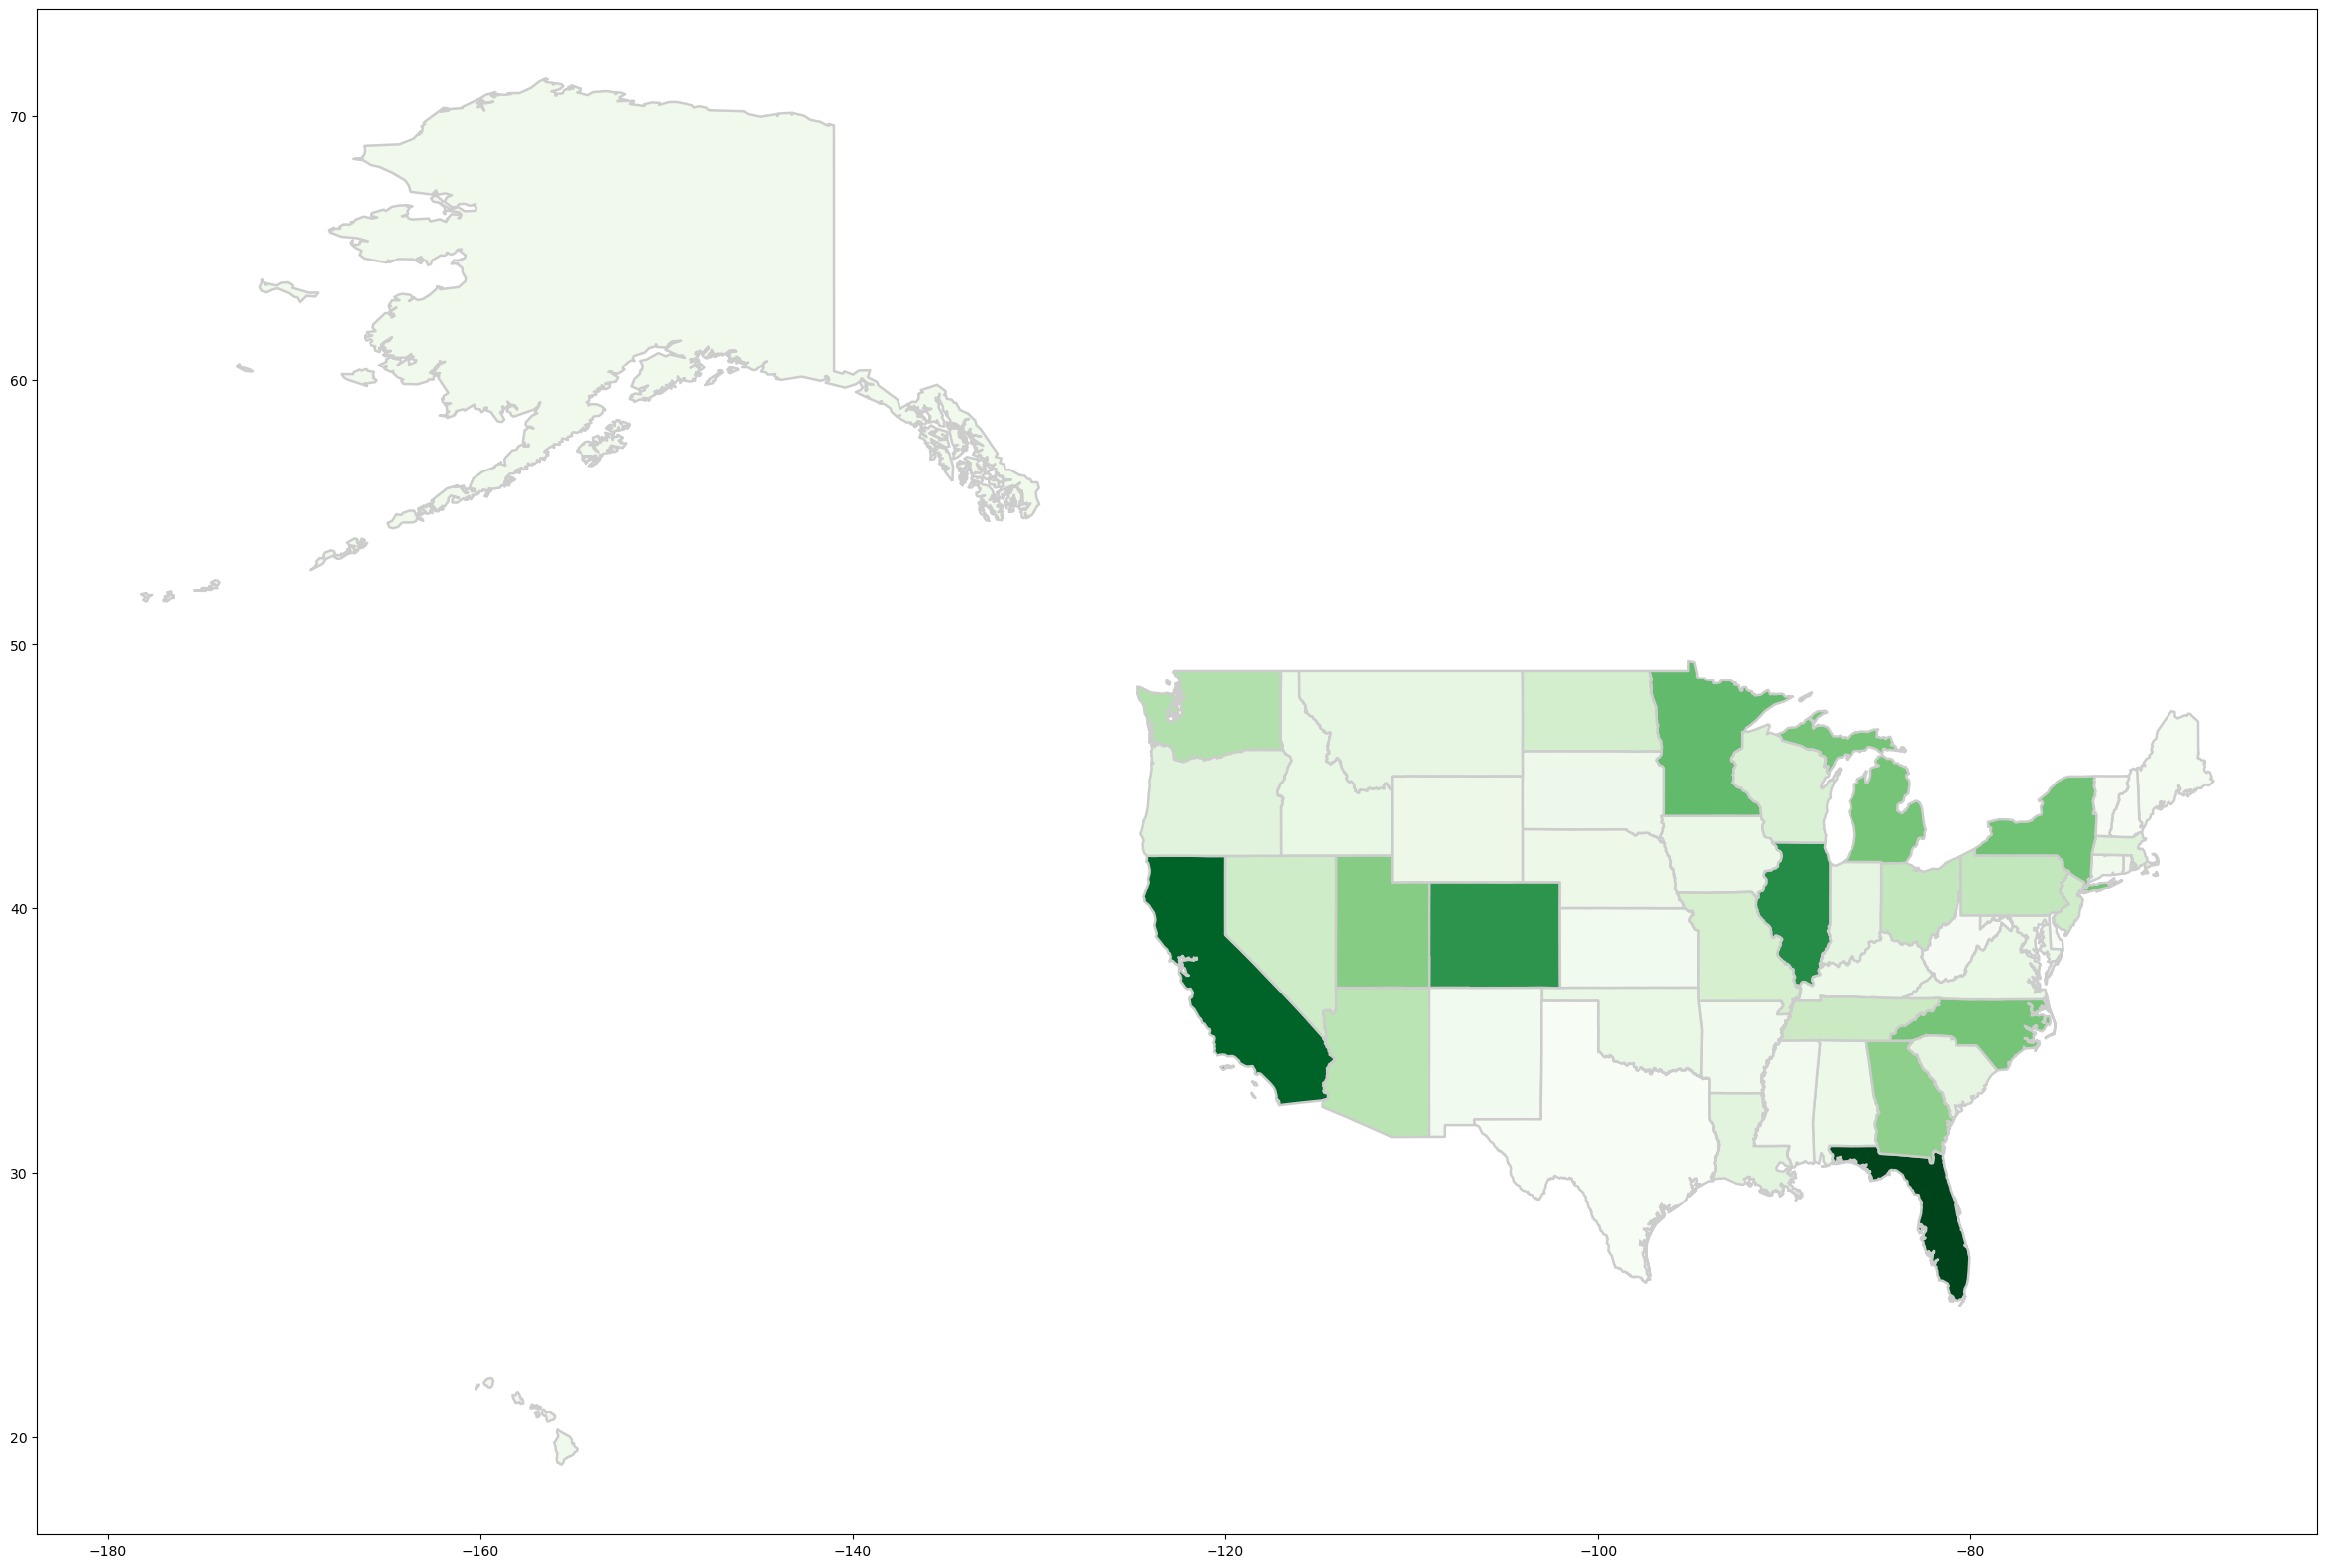

In [7]:
df1=df[df['Statecode'].str.contains('TX')==False]
merged1 = us_map.set_index('Statecode').join(df1.set_index('Statecode'))
merged1 = merged1.reset_index()
merged1 = merged1.fillna(0)
fig, ax1 = plt.subplots(1, figsize=(40, 20))
ax1.axis('off')
ax1.set_title('Weather Delays by State, Without Texas', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 250000
sm1 = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm1._A = []
cbar1 = fig.colorbar(sm1)
cbar1.ax.tick_params(labelsize=20)
merged1.plot('weather_delay', cmap=color, linewidth=1.8, edgecolor='0.8', figsize=(40,20))